In [1]:
import graphblas as gb
from graphblas import Matrix, Vector, dtypes, unary, binary, monoid, semiring
from graphblas.io import mmread

In [11]:
def pagerank(A, damping=0.85, itermax=100, tolerance=1e-4):
    A << A.apply(unary.one)
    N = A.nrows
    ri = Vector(dtypes.FP32, N)
    rj = Vector(dtypes.FP32, N)
    rj[:] << 1 / N
    rdiff = 1
    d_out = A.reduce_rowwise(monoid.plus).new(dtype="FP32")
    d_out(accum=binary.truediv)[:] << damping
    
    for i in range(itermax):
        if rdiff <= tolerance:
            break
        ri = rj
        rj = A.T.mxv(ri.ewise_mult(d_out, binary.truediv), semiring.plus_second) + (1 - damping) / N
        rdiff = abs(rj - ri).reduce(monoid.plus)
    
    return rj

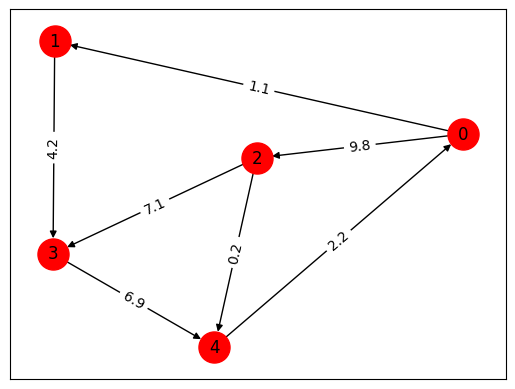

In [12]:
A = Matrix.from_coo(
    [0, 0, 1, 2, 2, 3, 4],
    [1, 2, 3, 3, 4, 4, 0],
    [1.1, 9.8, 4.2, 7.1, 0.2, 6.9, 2.2],
)
gb.viz.draw(A)

In [14]:
pagerank(A)

gb.VectorExpression                                         size  dtype
v_203.apply(binary.plus[FP64], right=0.030000000000000006)     5   FP64

"Result"   nvals  size  dtype
gb.Vector      5     5   FP64
-----------------------------
index         0         1         2         3         4
value  0.254213  0.138031  0.138031  0.205973  0.263752

Do expr.new() or other << expr to calculate the expression.

In [20]:
import networkx as nx

g = gb.io.to_networkx(A)
g.edges()
Vector().from_dict(nx.pagerank(g, tol=1e-4))

"v_212"    nvals  size  dtype  format
gb.Vector      5     5   FP64    full
-------------------------------------
index         0         1         2         3         4
value  0.254237  0.138079  0.138079  0.205937  0.263669

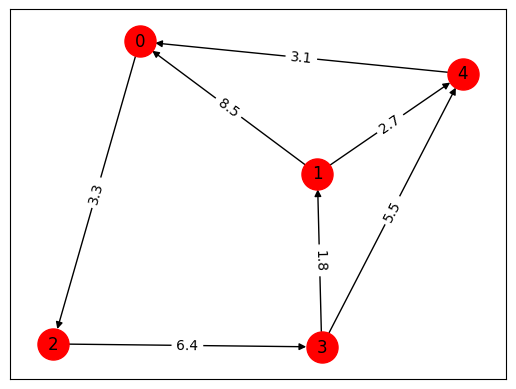

In [22]:
B = Matrix.from_coo(
    [0, 1, 1, 2, 3, 3, 4],
    [2, 0, 4, 3, 1, 4, 0],
    [3.3, 8.5, 2.7, 6.4, 1.8, 5.5, 3.1],
)
gb.viz.draw(B)

In [23]:
pagerank(B)

gb.VectorExpression                                         size  dtype
v_397.apply(binary.plus[FP64], right=0.030000000000000006)     5   FP64

"Result"   nvals  size  dtype
gb.Vector      5     5   FP64
-----------------------------
index         0         1         2         3         4
value  0.236496  0.126212  0.231042  0.226404  0.179846

Do expr.new() or other << expr to calculate the expression.

In [24]:
g = gb.io.to_networkx(B)
g.edges()
Vector().from_dict(nx.pagerank(g, tol=1e-4))

"v_403"    nvals  size  dtype  format
gb.Vector      5     5   FP64    full
-------------------------------------
index         0         1         2         3         4
value  0.236413  0.126249  0.230987  0.226488  0.179863